# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [2]:
#SEU CÓDIGO AQUI
base = pd.read_csv('CARRO_CLIENTES.csv', delimiter=",")
base.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [4]:
base = base.drop("User ID", axis=1)
base.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [5]:
#SEU CÓDIGO AQUI
base_code = pd.get_dummies(base, columns=["Gender"], drop_first=True)
base_code.head(5)

,Age,AnnualSalary,Purchased,Gender_Male
0,35,20000,0,True
1,40,43500,0,True
2,49,74000,0,True
3,40,107500,1,True
4,25,79000,0,True


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

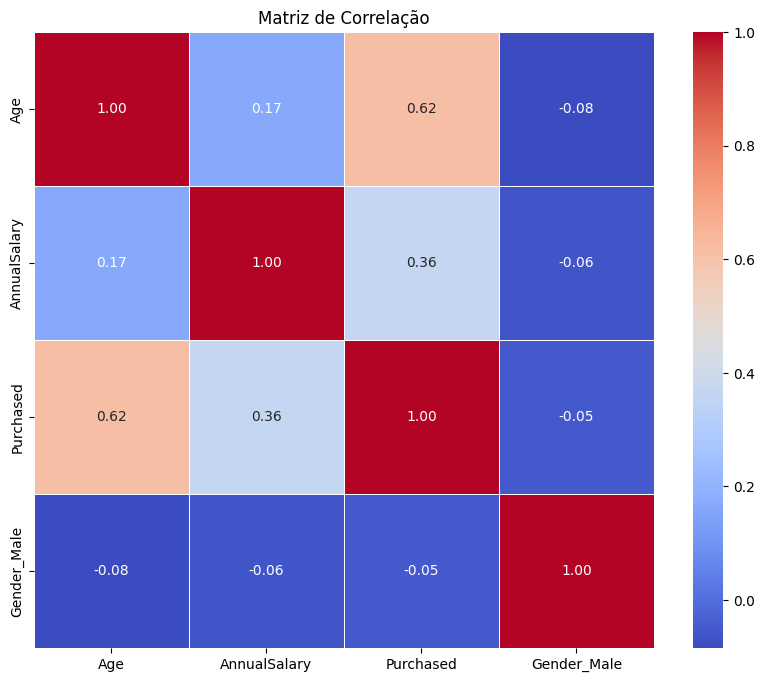

In [6]:
#SEU CÓDIGO AQUI

corr = base_code.corr()
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de Correlação")
plt.show()


Com o grafico de correlação noto que as colunas "Age" e "AnnualSalary" tem forte correlação com a nosso alvo. 

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [7]:
#SEU CÓDIGO AQUI
x = base_code.drop("Purchased", axis=1)
y = base_code['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("Base de treino antes do balanceamento", y_train.value_counts(normalize=True))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

Base de treino antes do balanceamento Purchased
0    0.59125
1    0.40875
Name: proportion, dtype: float64


((800, 3), (200, 3), (800,), (200,))

# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [8]:
#SEU CÓDIGO AQUI
model_xgboost = xgb.XGBClassifier(random_state=1, max_depth=5, n_estimators=100)
model_xgboost.fit(x_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [9]:
#SEU CÓDIGO AQUI
y_pred = model_xgboost.predict(x_test)# Previsão das Classes 
y_pred_prob = model_xgboost.predict_proba(x_test)# Probalidade das classes

# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [10]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

Aqui não precisou fazer a conversão pois nosso target ja era binario, nao precisando utilizar Label Encoder

In [11]:
#SEU CÓDIGO AQUI
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

Acurácia: 0.935
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       125
           1       0.93      0.89      0.91        75

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200

Matriz de Confusão:
[[120   5]
 [  8  67]]


Aqui notamos que o modelo possui boas métricas, apresentando um f1-score acima dos 90%, na matriz de confusão noto que o modelo classificou 120 verdadeiros negativo, e 5 falsos negativos, 8 falso positivo e 67 verdadeiro positivo.

# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

In [12]:
#SEU CÓDIGO AQUI
importances = model_xgboost.get_booster().get_score(importance_type='gain')
# Cola - .get_booster() - acessa o motor interno do XGBoost
# Cola - .get_score(importance_type='gain') - obtém as importâncias 
# Cola - importance_type='gain' - usa o ganho médio como métrica de importância

# Convertendo o dicionário de importâncias para um DataFrame
importance_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance'])
importance_df['Importance'] = importance_df['Importance'].astype(float)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

        Feature  Importance
0           Age    2.337090
1  AnnualSalary    1.300750
2   Gender_Male    0.640762


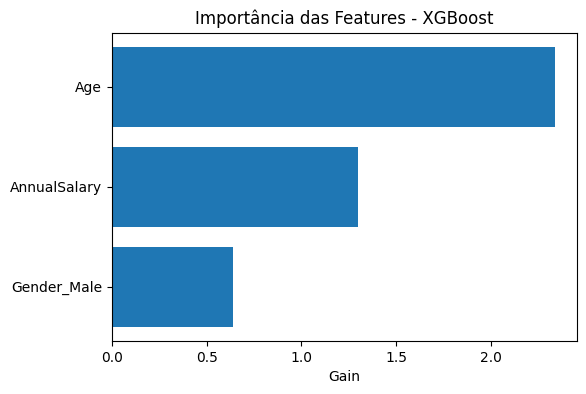

In [13]:
plt.figure(figsize=(6,4))
plt.barh(
    importance_df['Feature'],
    importance_df['Importance']
)
plt.gca().invert_yaxis()
plt.title('Importância das Features - XGBoost')
plt.xlabel('Gain')
plt.show()